# 1) Defining Problem Statement and Analysing basic metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


# Observations:
###### 1)There are no missing values in the data
###### 2)There are 3 unique products in the dataset
###### 3)KP281 is the most frequent product
###### 4)Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33
###### 5)Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years
###### 6)Out of 180 data points, 104's gender is Male and rest are the female
###### 7)Standard deviation for Income & Miles is very high. These variables might have the outliers in it

# 2) Non-Graphical Analysis: Value counts and unique attributes

In [7]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
product_count = df['Product'].value_counts().reset_index()
product_count.columns = ['Product_Name', 'Count']
product_count

,Product_Name,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [9]:
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']
gender_count

,Gender,Count
0,Male,104
1,Female,76


In [10]:
marital_status_count = df['MaritalStatus'].value_counts().reset_index()
marital_status_count.columns = ['MaritalStatus', 'Count']
marital_status_count

,MaritalStatus,Count
0,Partnered,107
1,Single,73


In [11]:
Fitness_count = df['Fitness'].value_counts().reset_index()
Fitness_count.columns = ['Fitness', 'Count']
Fitness_count

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [12]:
df.describe()[['Age', 'Income', 'Miles']].loc[['min', 'max']]

,Age,Income,Miles
min,18.0,29562.0,21.0
max,50.0,104581.0,360.0


In [13]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 3) Visual Analysis - Univariate & Bivariate

In [14]:
# # Distribution of Categorical Feature
# palette_color = sns.color_palette('bright')
# title = ['Product Distribution', 'Gender Distribution', 'MaritalStatus Distribution', 'Fitness Distribution']
# for i, col in enumerate(['Product', 'Gender', 'MaritalStatus', 'Fitness']):
#     print(i)
#     print(col)
#     product_count = df[col].value_counts().reset_index()
#     print(product_count)
#     data = list(product_count[col])
#     print(data)
#     keys = list(product_count['index'])
#     print(keys)
#     plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
#     plt.title(title[i])
#     plt.show()
#     print('-'*100)

# Univariate Analysis

# Understanding the distribution of the data for the quantitative attributes:
##### 1) Age
##### 2) Education
##### 3) Usage
##### 4) Fitness
##### 5) Income
##### 6) Miles

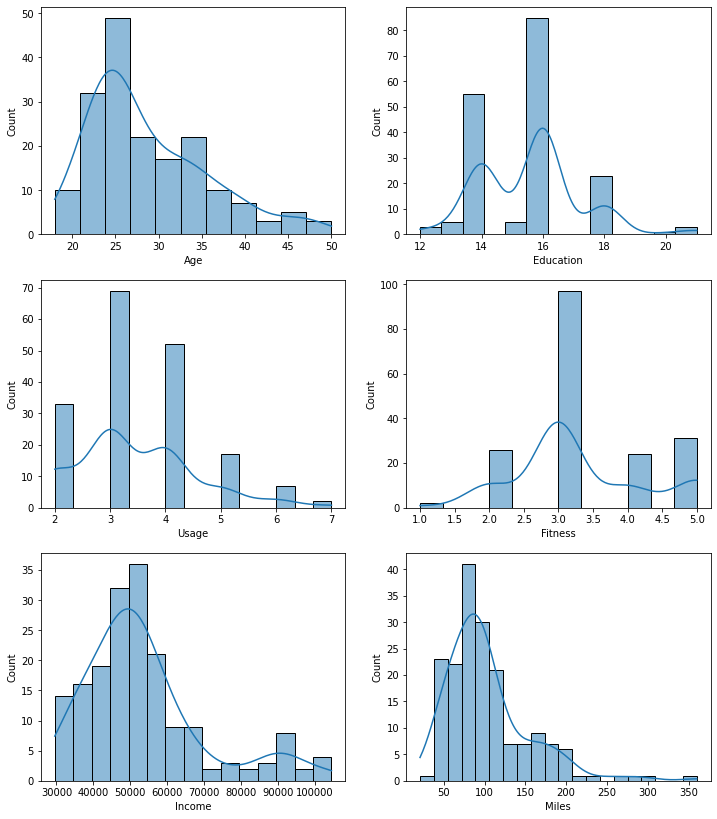

In [15]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

# Understanding the distribution of the data for the qualitative attributes:
##### 1) Product
##### 2) Gender
##### 3) MaritalStatus

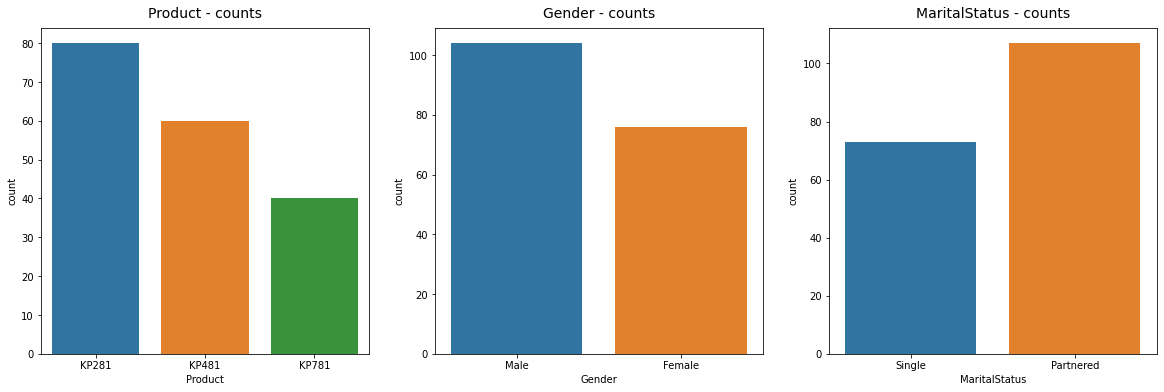

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

# Obervations
##### KP281 is the most frequent product.
##### Thare are more Males in the data than Females.
##### More Partnered persons are there in the data.

In [17]:
#To be precise - normalized count for each variable is shown below
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

# Obervations
### Product
##### . 44.44% of the customers have purchased KP2821 product.
##### . 33.33% of the customers have purchased KP481 product.
##### . 22.22% of the customers have purchased KP781 product.
### Gender
##### . 57.78% of the customers are Male.
### MaritalStatus
##### . 59.44% of the customers are Partnered.

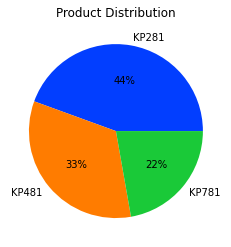

----------------------------------------------------------------------------------------------------


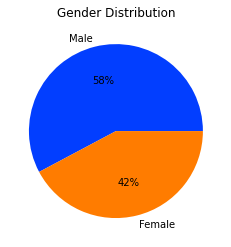

----------------------------------------------------------------------------------------------------


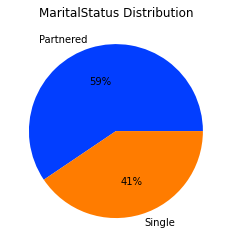

----------------------------------------------------------------------------------------------------


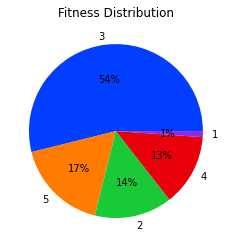

----------------------------------------------------------------------------------------------------


In [18]:
# Distribution of Categorical Feature
palette_color = sns.color_palette('bright')
title = ['Product Distribution', 'Gender Distribution', 'MaritalStatus Distribution', 'Fitness Distribution']
for i, col in enumerate(['Product', 'Gender', 'MaritalStatus', 'Fitness']):
    product_count = df[col].value_counts().reset_index()
    data = list(product_count[col])
    keys = list(product_count['index'])
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(title[i])
    plt.show()
    print('-'*100)

# Bivariate Analysis

[Text(0, 0, '17'), Text(0, 0, '23')]

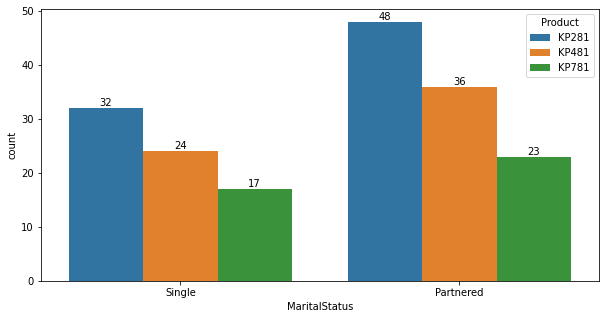

In [19]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='MaritalStatus', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

[Text(0, 0, '33'), Text(0, 0, '7')]

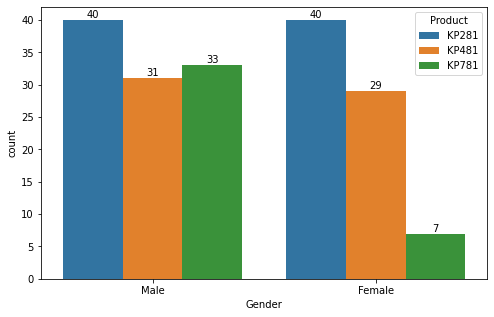

In [20]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Gender', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

Text(0.5, 1.0, 'Education Distribution on Product')

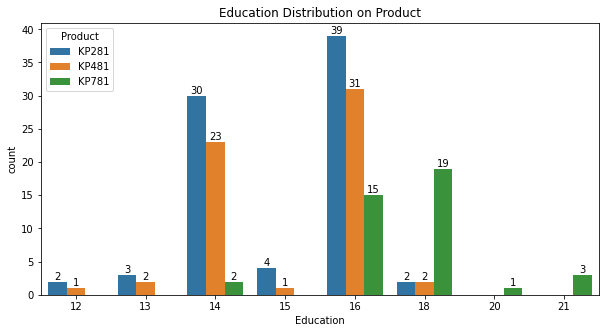

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Education', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Education Distribution on Product')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '29')]

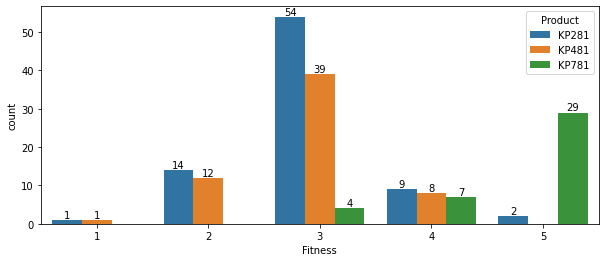

In [22]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Fitness', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

Text(0.5, 1.0, 'Usage Distribution')

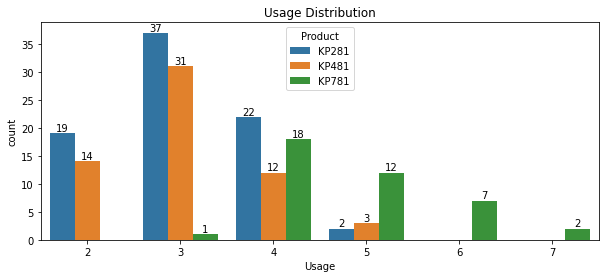

In [23]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Usage', hue='Product', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Usage Distribution')

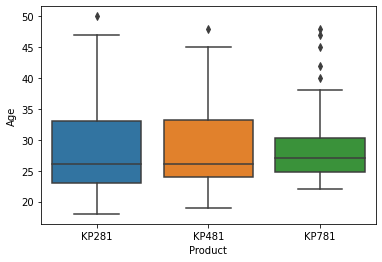

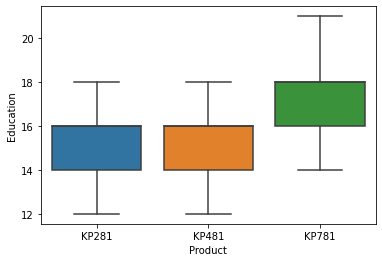

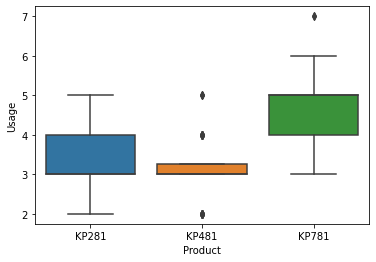

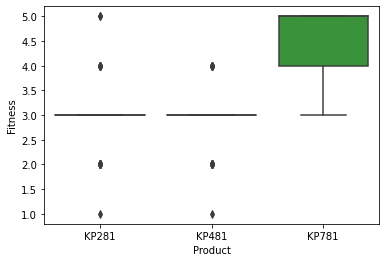

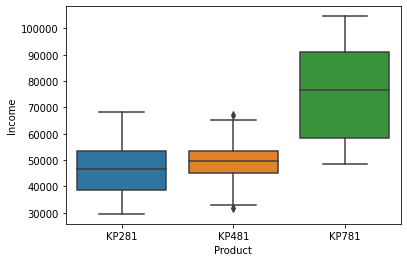

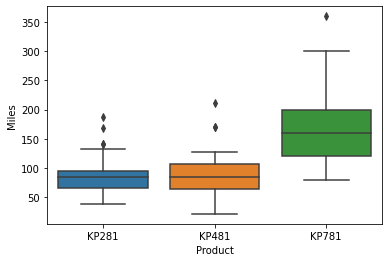

In [24]:
for col in ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:
    sns.boxplot(x='Product', y=col, data=df)
    plt.show()

# Observations
### Product vs Age
###### Customers purchasing products KP281 & KP481 are having same Age median value.
###### Customers whose age lies between 25-30, are more likely to buy KP781 product
### Product vs Education
###### Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
###### While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
### Product vs Usage
###### Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
###### While the other customers are likely to purchasing KP281 or KP481.
### Product vs Fitness
###### The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
### Product vs Income
###### Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
### Product vs Miles
###### If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

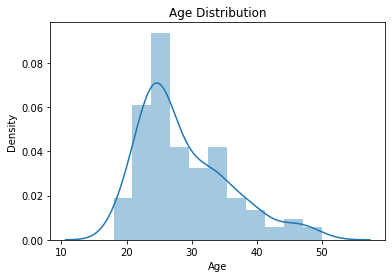

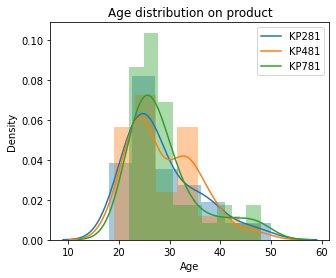

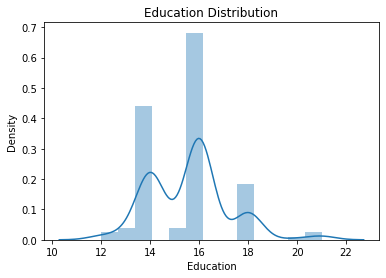

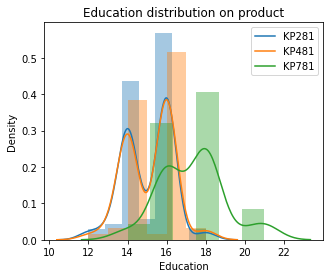

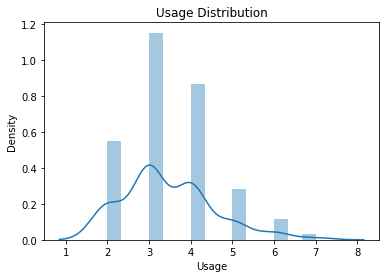

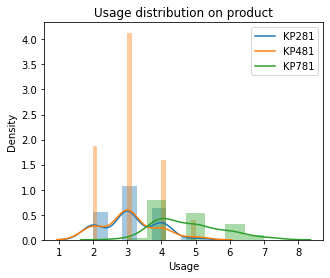

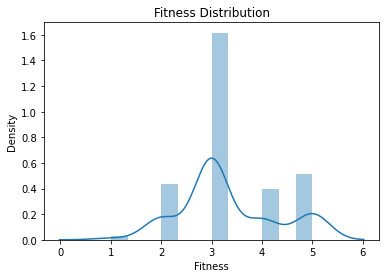

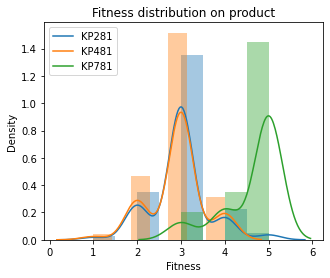

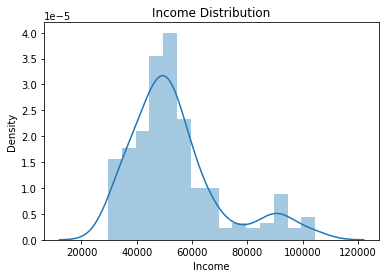

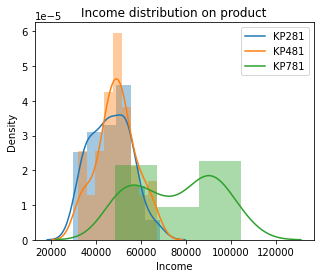

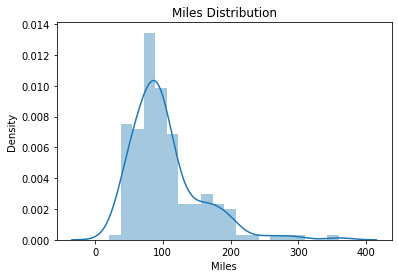

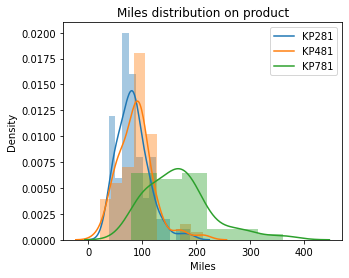

In [25]:
for col in ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']:  
    sns.distplot(df[col])
#     plt.legend()
    plt.title(f'{col} Distribution')
    plt.show()
#     for t in ['KP281', 'KP481', 'KP781']:
    plt.figure(figsize=(5,4))
    kp281 = df[df['Product']=='KP281']
    kp481 = df[df['Product']=='KP481']
    kp781 = df[df['Product']=='KP781']
    sns.distplot(kp281[col])
    sns.distplot(kp481[col])
    sns.distplot(kp781[col])
    plt.legend(['KP281', 'KP481', 'KP781'])
    plt.title(f'{col} distribution on product')
    plt.show()

In [26]:
# for col in ['Age', 'Income', 'Miles']:  
#     sns.distplot(df[col])
# #     plt.legend()
#     plt.title(f'{col} Distribution')
#     plt.show()
# #     for t in ['KP281', 'KP481', 'KP781']:
#     plt.figure(figsize=(5,4))
#     kp281 = df[df['Product']=='KP281']
#     kp481 = df[df['Product']=='KP481']
#     kp781 = df[df['Product']=='KP781']
#     sns.distplot(kp281[col])
#     sns.distplot(kp481[col])
#     sns.distplot(kp781[col])
#     plt.legend(['KP281', 'KP481', 'KP781'])
#     plt.title(f'{col} distribution on product')
#     plt.show()

<Axes: >

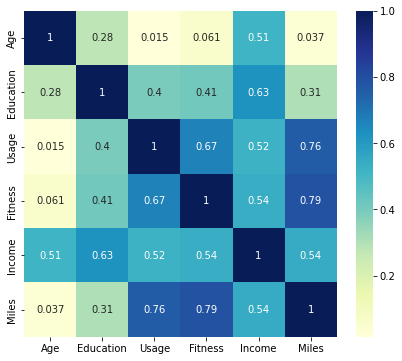

In [27]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

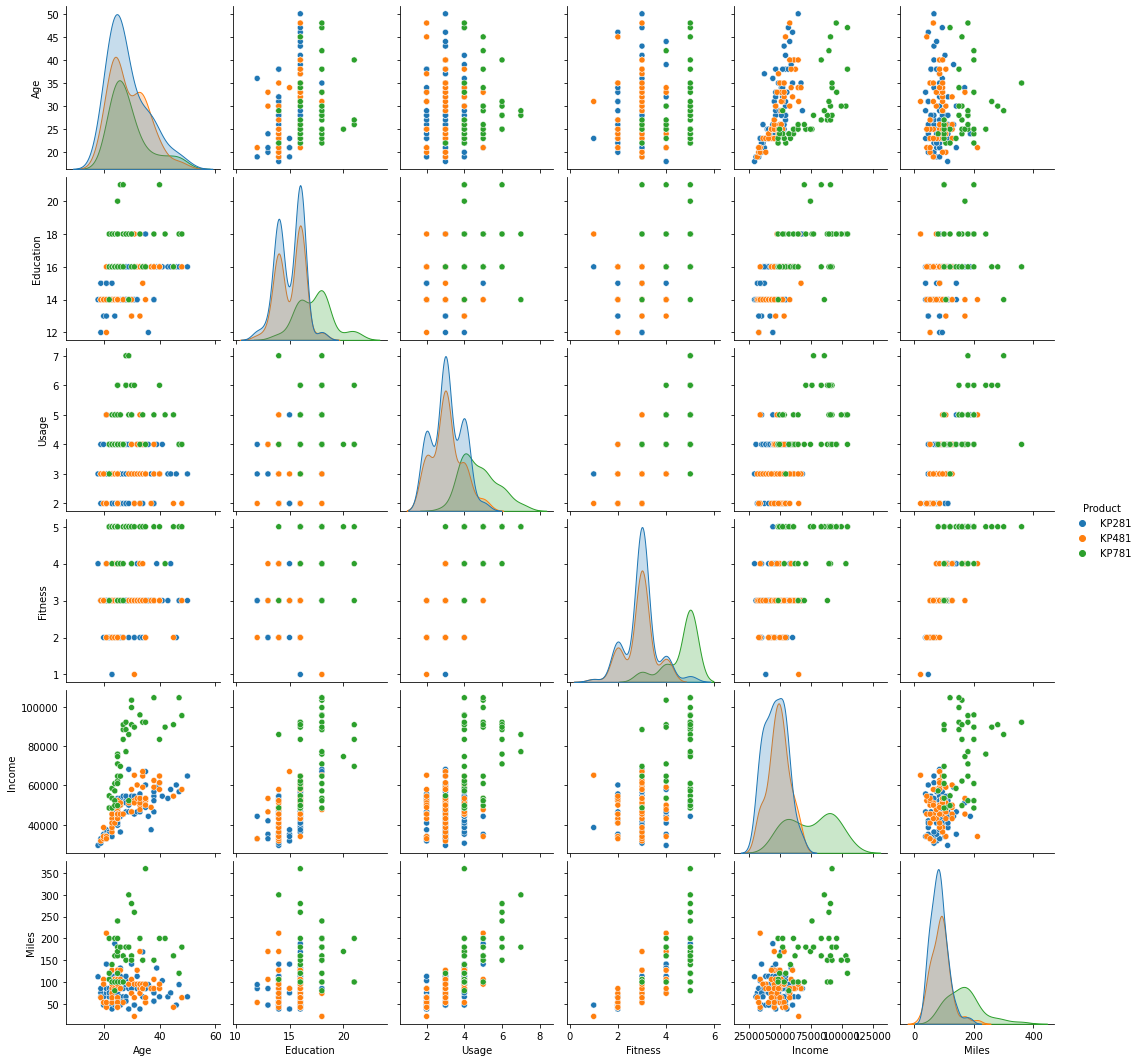

In [28]:
sns.pairplot(df, hue ='Product')

# 4) Missing Value & Outlier Detection

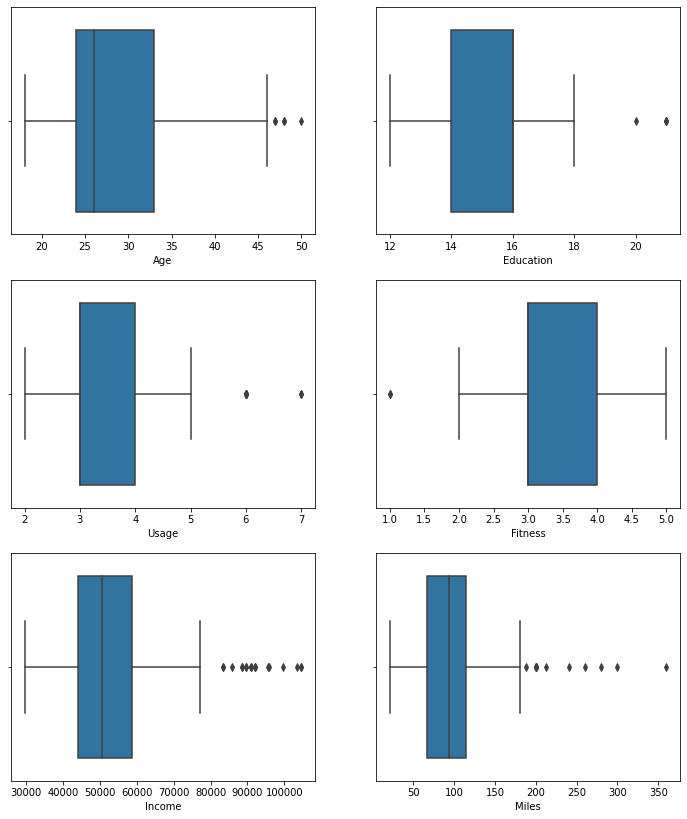

In [29]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

# Obervation
Even from the boxplots it is quite clear that:

Age, Education and Usage are having very few outliers.
While Income and Miles are having more outliers.

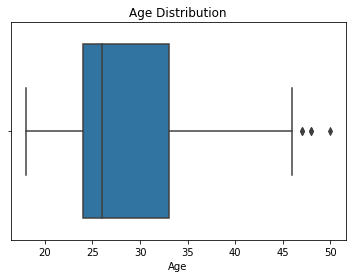

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


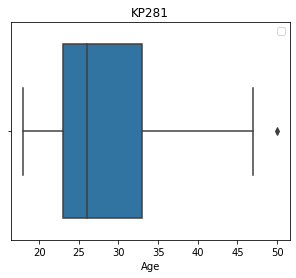

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


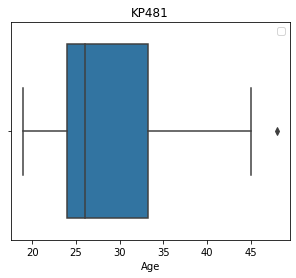

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


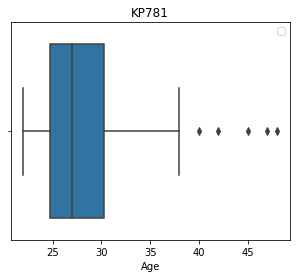

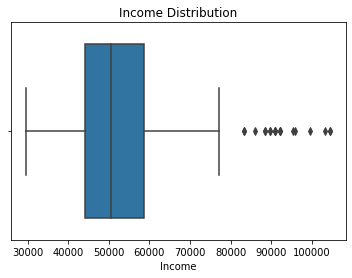

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


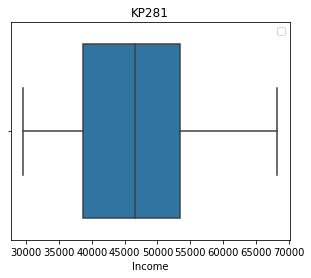

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


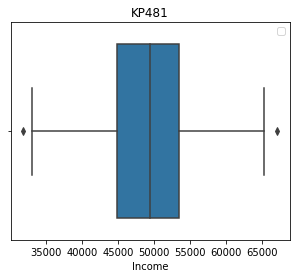

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


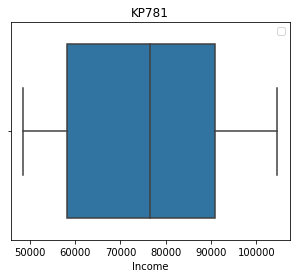

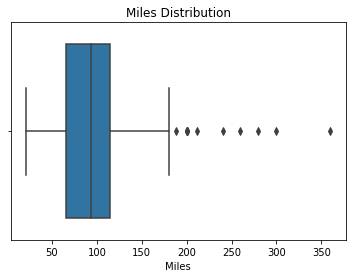

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------------------------------------------------------------------------------------------------


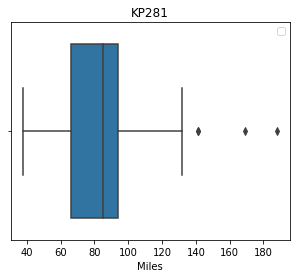

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


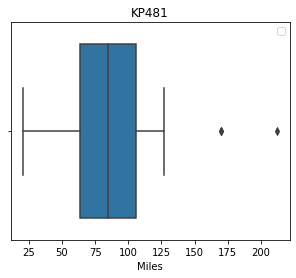

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


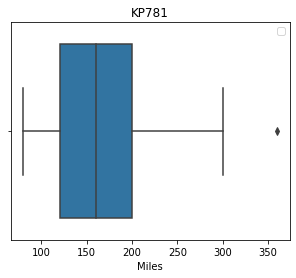

In [30]:
# Checking Outliers
title = np.array(['Age Distribution', 'Income Distribution', 'Miles Distribution'])
for i, col in enumerate(['Age', 'Income', 'Miles']):
    sns.boxplot(x=col, data=df)
    plt.title(title[i])
    plt.show()
    print('-'*100)
    for t in ['KP281', 'KP481', 'KP781']:
        plt.figure(figsize=(5,4))
        kp = df[df['Product']==t]
        sns.boxplot(kp[col])
        plt.legend()
        plt.title(t)
        plt.show()

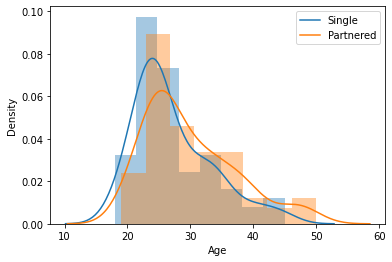

In [31]:
single = df[df['MaritalStatus']=='Single']
married = df[df['MaritalStatus']=='Partnered']
sns.distplot(x=single['Age'])
sns.distplot(x=married['Age'])
plt.legend(['Single', 'Partnered'])
plt.xlabel('Age')
plt.show()

In [32]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [33]:
df['Product'].value_counts(normalize=True).round(2)

KP281    0.44
KP481    0.33
KP781    0.22
Name: Product, dtype: float64

In [34]:
pd.crosstab(df['Product'],[df['Gender']], normalize=True, margins=True, margins_name='Total').round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [35]:
pd.crosstab(df['Product'],[df['MaritalStatus']], normalize=True, margins=True, margins_name='Total').round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


In [36]:
pd.crosstab(df['Product'],[df['Fitness']], normalize=True, margins=True, margins_name='Total').round(2)

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
Total,0.01,0.14,0.54,0.13,0.17,1.00


In [37]:
pd.crosstab(df['Product'],[df['Education']], normalize=True, margins=True, margins_name='Total').round(2)

Education,12,13,14,15,16,18,20,21,Total
Product,,,,,,,,,
KP281,0.01,0.02,0.17,0.02,0.22,0.01,0.00,0.00,0.44
KP481,0.01,0.01,0.13,0.01,0.17,0.01,0.00,0.00,0.33
KP781,0.00,0.00,0.01,0.00,0.08,0.11,0.01,0.02,0.22
Total,0.02,0.03,0.31,0.03,0.47,0.13,0.01,0.02,1.00


# 6) Recommendations
1. Target more customers having age between 18 to 35 as more than 85% of the customers who bought treadmill lie in this range.
2. Males are more likely to purchase a treadmill with 58% ratio than Females. Both are likely to purchase equal number of KP281 and KP481, but Males have high chances of purchasing KP781 as 82% of total sale of KP781 is purchased by Males.
3. People with Education levels less than or equal to 16 are likely to purchase KP281 and KP481. And people with Education levels greater than or equal to 16 are likely to purchase KP781.
4. People with Usage less than or equal to 4 are likely to purchase KP281 and KP481. And people with Usage greater than or equal to 4 are likely to purchase KP781.
5. People with Income less than 6000 are likely to purchase KP281 and KP481. And people with Income greater than 6000 are likely to purchase KP781.
6. People with Fitness Level 3 or less are likely to purchase KP281 and KP481. And with Fitness Level 5 are likely to purchase KP781.
7. People who use the treadmill more are more likely to purchase KP781. As, buying the treadmill is directly proportional to it's usage.